In [18]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install folium

     |████████████████████████████████| 94 kB 523 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install statsmodels -U

Requirement already up-to-date: statsmodels in /opt/conda/save/jupyter/lib/lib (0.12.2)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show plotnine

Name: plotnine
Version: 0.8.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /opt/conda/save/jupyter/lib/lib
Requires: descartes, numpy, scipy, patsy, mizani, statsmodels, matplotlib, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /opt/conda/save/jupyter/lib/lib
Requires: numpy, matplotlib, seaborn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import re

In [7]:
# plotnine 이 import 되지 않는다면 아래 코드의 주석을 풀고 설치해 주세요.
# !pip install statsmodels -U

In [8]:
from plotnine import *

In [9]:
# %을 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용하실 수 있습니다. 경로를 불러오는 문제가 있을 때 이 방법을 사용하면 좋습니다.

In [10]:
# 현재 위치정보를 봅니다.
# %pwd

In [11]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다. 해당 파일을 확인해 봅니다.
# %ls data/apt_price/

In [22]:
pre_sale = pd.read_csv('./주택도시보증공사_전국 신규 민간 아파트 분양가격 동향_20200331.csv', encoding='euc-kr', engine='python')
pre_sale.shape

(4590, 5)

In [23]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [24]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN
4589,제주,전용면적 102㎡초과,2020,3,3601


In [25]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [26]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [27]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
dtype: int64

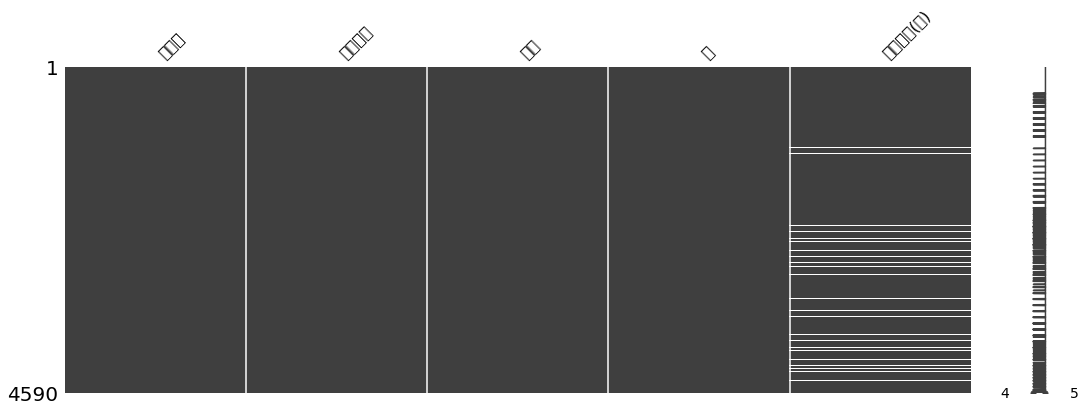

In [28]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [29]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [30]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [31]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [32]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   object 
 3   월        4590 non-null   object 
 4   분양가격(㎡)  4276 non-null   object 
 5   분양가격     4260 non-null   float64
 6   평당분양가격   4260 non-null   float64
dtypes: float64(2), object(5)
memory usage: 251.1+ KB


In [33]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [34]:
# 분양가격에 결측치가 많이 있어요.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
분양가격       330
평당분양가격     330
dtype: int64

In [35]:
pre_sale.describe()

,분양가격,평당분양가격
count,4260.000000,4260.000000
mean,3270.160798,10791.530634
std,1300.362742,4291.197050
min,1868.000000,6164.400000
25%,2454.750000,8100.675000
50%,2890.000000,9537.000000
75%,3601.000000,11883.300000
max,13835.000000,45655.500000


In [36]:
# pre_sale.describe?

In [37]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4590,4590,4590,4590,4276
unique,17,5,6,12,1766
top,부산,전체,2019,3,3395
freq,270,918,1020,425,18


In [38]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [39]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전체                   918
전용면적 102㎡초과          918
전용면적 60㎡이하           918
전용면적 85㎡초과 102㎡이하    918
전용면적 60㎡초과 85㎡이하     918
Name: 규모구분, dtype: int64

In [40]:
pre_sale['지역명'].value_counts()

부산    270
경기    270
서울    270
울산    270
광주    270
충북    270
세종    270
충남    270
제주    270
전남    270
전북    270
강원    270
대구    270
경북    270
대전    270
인천    270
경남    270
Name: 지역명, dtype: int64

# 전국평균 분양가격

- groupby 와 pivot_table 활용하기

In [41]:
# ?를 통해 도움말 보기
# pre_sale.groupby?

In [42]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018   2019   2020
분양가격   count    243    984    975    919    912    227
       mean   2,789  2,934  3,143  3,327  3,693  3,856
       std      977  1,071  1,111  1,186  1,563  1,755
       min    1,868  1,900  1,976  2,076  2,124  2,297
       25%    2,225  2,282  2,373  2,525  2,636  2,667
       50%    2,516  2,672  2,838  2,952  3,395  3,534
       75%    3,026  3,148  3,466  3,698  4,066  4,276
       max    7,092  8,096  7,887  8,098 12,728 13,835
평당분양가격 count    243    984    975    919    912    227
       mean   9,203  9,683 10,373 10,979 12,188 12,725
       std    3,224  3,536  3,665  3,914  5,159  5,792
       min    6,164  6,270  6,521  6,851  7,009  7,580
       25%    7,342  7,531  7,831  8,332  8,697  8,801
       50%    8,303  8,818  9,365  9,742 11,204 11,662
       75%    9,984 10,390 11,438 12,203 13,419 14,109
       max   23,404 26,717 26,027 26,723 42,002 45,656

## 규모별 전국 평균 분양가격

In [43]:
# ?로 도움말 보기
# pre_sale.pivot_table?

In [44]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,"9,837","10,389","11,311","11,446","13,332","13,850"
전용면적 60㎡이하,"8,952","9,399","10,271","10,844","11,507","11,967"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,840","10,651","11,677","11,857"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,573","11,442","12,981","14,975"
전체,"8,893","9,293","9,927","10,676","11,603","11,879"


# 전국 분양가 변동금액

규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [45]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019,2020
0,강원,"7,160","7,011","7,171","7,681","8,142","8,226"
1,경기,"10,377","11,220","11,841","13,186","14,469","14,829"
2,경남,"7,586","7,848","8,164","9,019","9,871","10,003"
3,경북,"7,171","7,361","7,803","8,505","8,857","9,002"
4,광주,"8,052","8,899","9,471","9,856","11,823","12,682"
5,대구,"9,232","10,310","11,507","12,076","13,852","14,672"
6,대전,"8,098","8,502","9,056","10,180","11,778","11,733"
7,부산,"10,307","10,430","11,664","12,998","13,116","12,934"
8,서울,"19,725","20,663","21,425","22,889","26,131","26,534"
9,세종,"8,750","8,860","9,133","10,355","11,079","11,411"


In [46]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 4,485,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 188,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,780,059원이다.


연도,지역명,2015,2016,2017,2018,2019,2020,변동액
0,강원,"7,160","7,011","7,171","7,681","8,142","8,226",520
1,경기,"10,377","11,220","11,841","13,186","14,469","14,829",2808
2,경남,"7,586","7,848","8,164","9,019","9,871","10,003",1433
3,경북,"7,171","7,361","7,803","8,505","8,857","9,002",1334
4,광주,"8,052","8,899","9,471","9,856","11,823","12,682",1803
5,대구,"9,232","10,310","11,507","12,076","13,852","14,672",2843
6,대전,"8,098","8,502","9,056","10,180","11,778","11,733",2082
7,부산,"10,307","10,430","11,664","12,998","13,116","12,934",2690
8,서울,"19,725","20,663","21,425","22,889","26,131","26,534",3164
9,세종,"8,750","8,860","9,133","10,355","11,079","11,411",1604


- 지금까지 2015년 10월에서 2018년 7월까지의 21개월간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약해 봤습니다.
- Pandas를 통해 데이터를 가져오고 요약해 보고 엑셀과 비슷하게 피봇테이블을 그려보기도 하고 groupby를 사용해서 데이터를 요약해 보기도 했습니다.

# 시각화

- 데이터를 시각화 해보기에 앞서 앤스콤의 4인방을 보겠습니다.
- 아래 4개의 그래프는 다른 데이터로 그려졌습니다.
- 또 이 4개의 데이터는 평균, 표준편차, 상관계수가 같습니다. 하지만 시각화 했을 때 전혀 다른 데이터임을 확인할 수 있습니다.
- 이 앤스콤의 4인방은 요약된 데이터만으로 데이터를 판단할 수 없다는 것을 보여줍니다.
- 데이터 시각화의 중요성을 얘기할 때 자주 등장하는 예시입니다.
- [Anscombe's quartet - Wikipedia] (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen - Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing | Autodesk Research] (https://www.autodesk.com/research/publications/same-stats-different-graphs)

# A Grammar of Graphics for Python — plotnine

- tutorial
- ggplot2-cheatsheet
- 이미지 출처 : A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional…

## 연도별 변동 그래프

- 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
- 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요합니다.
- 폰트는 나눔고딕이 설치되어 있어서 나눔고딕을 불러왔지만, 각자의 환경에 맞는 폰트를 가져와야 합니다.
- 한글폰트를 지정해 주지 않는다면 글자가 두부모양으로 깨져보이게 됩니다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


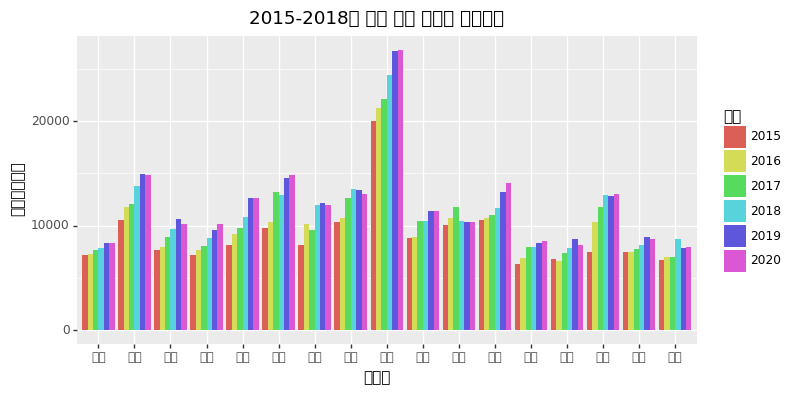

<ggplot: (8759829879617)>

In [47]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

## 지역별 평당 분양가격 합계

- 아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지를 봅니다.
- 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있습니다.

In [50]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"8,579","14,870","10,339","9,210","11,236","13,287","14,875","13,260","23,771","10,251","9,941","14,502","8,314","8,225","10,604","8,705","8,219"
전용면적 60㎡이하,"7,610","13,399","8,723","7,919","9,641","12,105","9,326","11,428","23,448","9,318","9,397","11,348","7,294","7,647","14,062","7,910","7,149"
전용면적 60㎡초과 85㎡이하,"7,525","12,617","8,694","8,108","10,061","11,944","9,804","11,939","22,953","9,840","10,502","11,499","7,337","7,317","10,773","7,862","7,285"
전용면적 85㎡초과 102㎡이하,"8,818","13,885","10,049","8,774","9,296","11,292","9,078","12,212","26,938","9,932","8,861","11,611","7,942","8,326","10,709","9,221","8,391"
전체,"7,522","12,670","8,733","8,126","10,051","11,938","9,883","12,004","22,816","9,882","10,499","11,379","7,352","7,339","10,929","7,854","7,245"


## 규모별

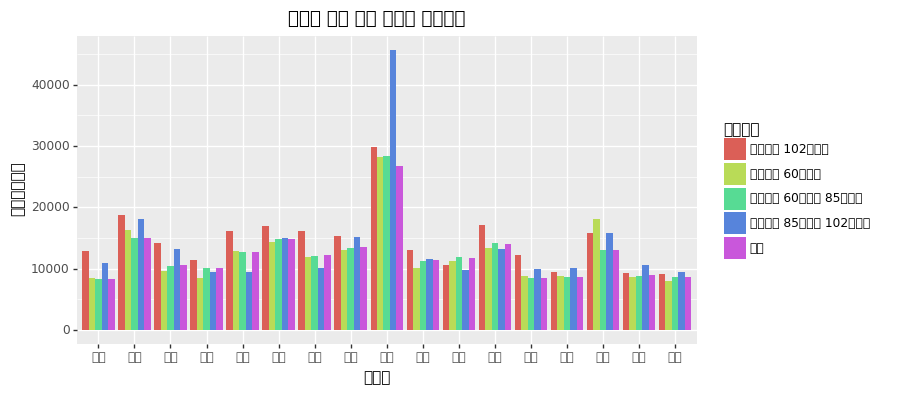

<ggplot: (8759743593993)>

In [51]:

# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

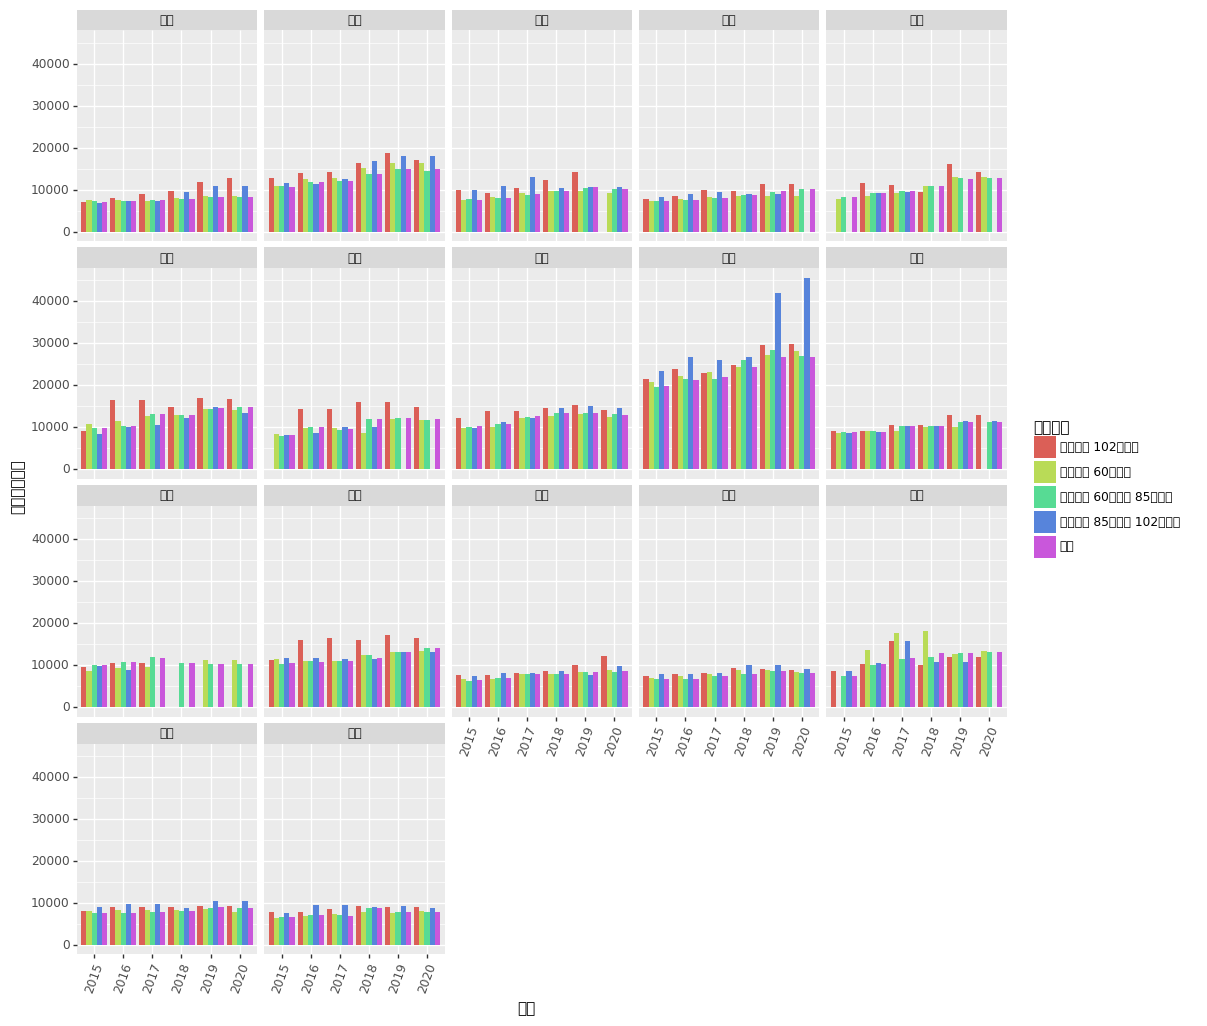

<ggplot: (8759743169889)>

In [52]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

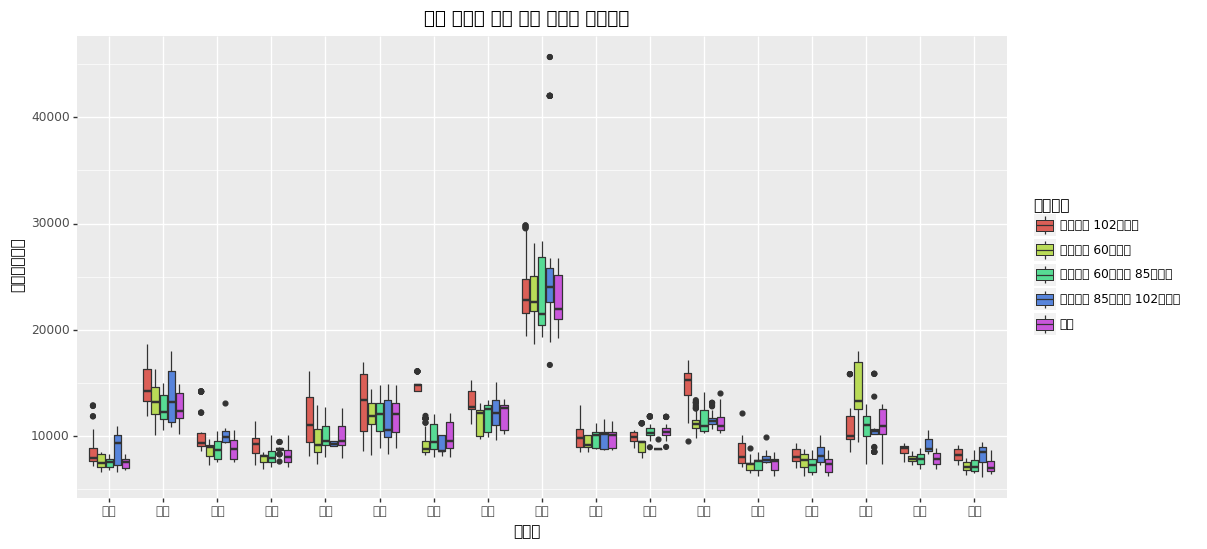

<ggplot: (8759761269057)>

In [54]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

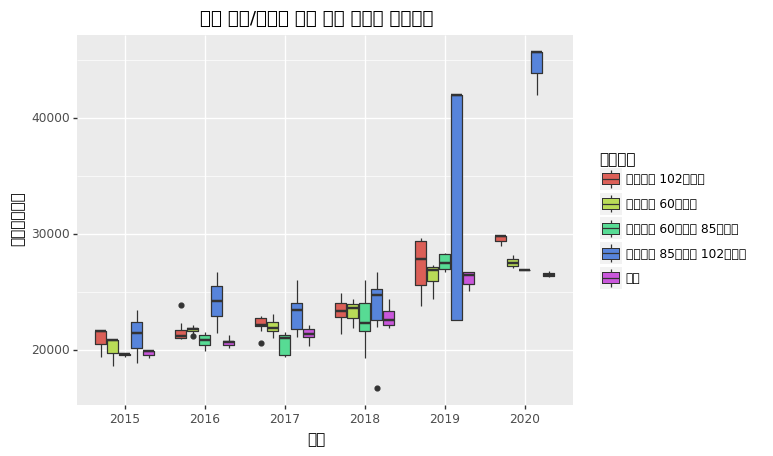

<ggplot: (8759742316257)>

In [55]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

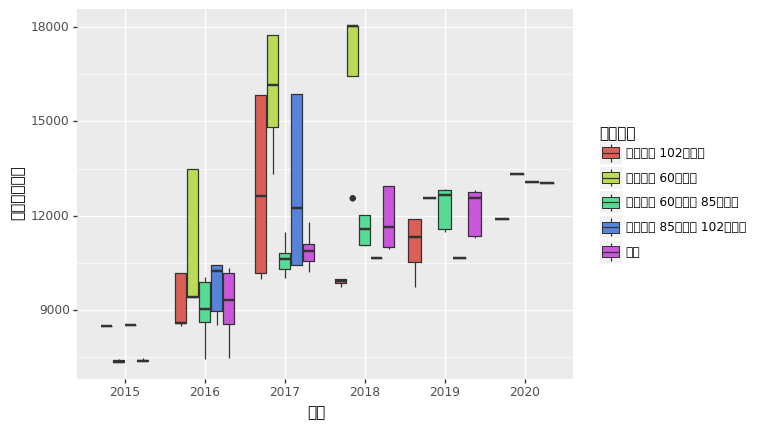

<ggplot: (8759743659437)>

In [56]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

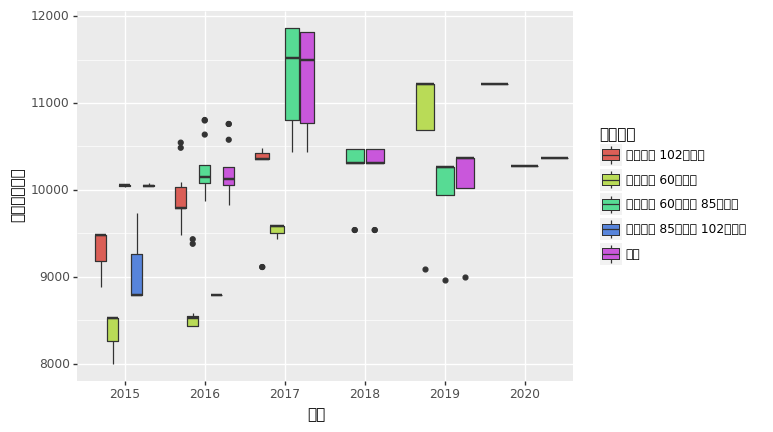

<ggplot: (8759743533101)>

In [58]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였습니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

## Tidy Data 만들기

Tidy data - Wikipedia <https://en.wikipedia.org/wiki/Tidy_data> ## 2013년 12월~2015년 9월 3.3㎡당 분양가격
2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.
지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv을 https://www.data.go.kr/dataset/3035522/fileData.do 에서 다운로드 받거나 다음의 경로에서 다운로드 받습니다. https://goo.gl/oJydAv